In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Reading in CSV's and Naming Features

In [9]:
imdb_name_basics = pd.read_csv('imdb.name.basics.csv')

FileNotFoundError: [Errno 2] File b'imdb.name.basics.csv' does not exist: b'imdb.name.basics.csv'

In [7]:
imdb_title_akas = pd.read_csv('imdb.title.akas.csv')

FileNotFoundError: [Errno 2] File b'imdb.title.akas.csv' does not exist: b'imdb.title.akas.csv'

In [ ]:
imdb_title_basics = pd.read_csv('imdb.title.basics.csv')

In [6]:
imdb_title_crew = pd.read_csv('imdb.title.crew.csv')


In [7]:
imdb_title_principals = pd.read_csv('imdb.title.principals.csv')


In [8]:
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv')


In [9]:
rt_movie_info = pd.read_csv('rt.movie_info.tsv', delimiter = '\t')

In [10]:
rt_reviews = pd.read_csv('rt.reviews.tsv', delimiter = '\t', encoding = 'windows-1252')

In [11]:
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Merging IMDB Tables

In [12]:
# Merge IMDB tables on tconst (renamed to 'title_id')
imdb_title_ratings_principals = pd.merge(imdb_title_ratings, imdb_title_principals, on = 'title_id', how = 'outer')
imdb_title_full = pd.merge(imdb_title_ratings_principals, imdb_title_crew, on = 'title_id', how = 'outer')
imdb_title_names_full = pd.merge(imdb_title_full, imdb_name_basics, on = 'nconst', how = 'outer')
imdb_title_names_full.head()
imdb_title_names_full.shape


(1033234, 15)

# Drop Columns not related to average rating

In [13]:
#drop unecessary columns
imdb_title_names_full = imdb_title_names_full.drop('job', axis = 1)
imdb_title_names_full = imdb_title_names_full.drop('birth_year', axis = 1)
imdb_title_names_full = imdb_title_names_full.drop('death_year', axis = 1)
imdb_title_names_full = imdb_title_names_full.drop('ordering', axis = 1)
imdb_title_names_full = imdb_title_names_full.drop('nconst', axis = 1)
imdb_title_names_full = imdb_title_names_full.drop('numvotes', axis = 1)
imdb_title_names_full = imdb_title_names_full.drop('directors', axis = 1)
imdb_title_names_full = imdb_title_names_full.drop('writers', axis = 1)
imdb_title_names_full = imdb_title_names_full.drop('characters', axis = 1)
imdb_title_names_full = imdb_title_names_full.drop('known_for_titles', axis = 1)
imdb_title_names_full = imdb_title_names_full.drop('tconst', axis = 1)

In [14]:
# Drop NaN Average Rating
imdb_clean = imdb_title_names_full.dropna()
imdb_clean.head(10)


,averagerating,category,primary_name,primary_profession
0,8.3,production_designer,Kazi Rafik Ali,"production_designer,art_department"
1,8.3,production_designer,Kazi Rafik Ali,"production_designer,art_department"
3,8.3,actor,Harish Verma,actor
4,6.4,actor,Harish Verma,actor
5,6.4,actor,Harish Verma,actor
6,6.9,actor,Harish Verma,actor
7,5.8,actor,Harish Verma,actor
8,7.3,actor,Harish Verma,actor
9,7.8,actor,Harish Verma,actor
10,7.6,actor,Harish Verma,actor


In [15]:
imdb_names_count = imdb_clean.primary_name.value_counts()
imdb_names_count

Kevin MacLeod                 171
Eric Roberts                  122
William Shakespeare           110
Gopi Sundar                    97
Vicente G. del Rosario III     79
                             ... 
Robyn Church                    1
Lucy Shuttleworth               1
Rebecca Lawrence Levy           1
Cornelius Muller                1
Linda Sokhulu                   1
Name: primary_name, Length: 328149, dtype: int64

In [16]:
# Data Assumption: Only counting people with > 10 movies 
imdb_prominent_names = imdb_names_count.loc[imdb_names_count > 30]
imdb_prominent_names.index

Index(['Kevin MacLeod', 'Eric Roberts', 'William Shakespeare', 'Gopi Sundar',
       'Vicente G. del Rosario III', 'S. Thaman', 'Prakash Raj',
       'Brahmanandam', 'Veronique del Rosario-Corpus', 'Jason Blum',
       ...
       'Olivier Gourmet', 'Salim Kumar', 'V. Jayaprakash', 'Behzad Abdi',
       'Soori', 'Kristian Eidnes Andersen', 'Kenji Kawai', 'Bhavana',
       'Hirofumi Arai', 'Shôta Sometani'],
      dtype='object', length=164)

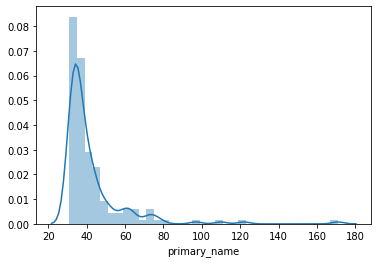

In [17]:
imdb_graph = sns.distplot(imdb_prominent_names)

# Group DF by name and rating


In [18]:
average_ratings_by_name = imdb_clean.groupby('primary_name').mean()
average_ratings_by_name.sort_values('averagerating', ascending = False)


,averagerating
primary_name,
Cara Artman,10.0
Lance Vogel,10.0
Batman,10.0
Aurora Sharon Lewis,10.0
Ivana Diniz,10.0
...,...
Ramo Nakajima,1.0
Shûko Nemoto,1.0
Alveda King,1.0


In [19]:
name, count = np.unique(imdb_clean.primary_name, return_counts=True)

In [20]:
more_than_9 = []
for name, count in zip(name, count):
    if count > 9:
        more_than_9.append(name)

In [40]:
top_name_ratings = imdb_clean[imdb_clean.primary_name.isin(more_than_9)].sort_values('averagerating', ascending = False).iloc[0:10]


    
    
    


In [36]:
#Check for duplicates
top_name_ratings[top_name_ratings.duplicated(keep = False)].sort_values('primary_name')

,averagerating,category,primary_name,primary_profession


In [23]:
more_than_9

["'Ganja' Karuppu",
 '50 Cent',
 'A. Sreekar Prasad',
 'A. Venkatesh',
 'A.J. Mattioli',
 'A.N. Balakrishnan',
 'A.R. Murugadoss',
 'A.R. Rahman',
 'AJ Bowen',
 'Aadhi',
 'Aadukalam Naren',
 'Aamir Khan',
 'Aanand L. Rai',
 'Aaron Aziz',
 'Aaron Cohen',
 'Aaron Eckhart',
 'Aaron Gilhuis',
 'Aaron Kovalchik',
 'Aaron Kwok',
 'Aaron L. Gilbert',
 'Aaron Moorhead',
 'Aaron Paul',
 'Aaron Stielstra',
 'Aaron Taylor-Johnson',
 'Aaron Zigman',
 'Aarti Bajaj',
 'Aashiq Abu',
 'Abbey Hoes',
 'Abbie Cornish',
 'Abburi Ravi',
 'Abdul Aziz',
 'Abdullah Zahir Babu',
 'Abel Ferrara',
 'Abhijeet Shirish Deshpande',
 'Abhijit Deshpande',
 'Abhijit Guha',
 'Abhijit Majumdar',
 'Abhimanyu Mukherjee',
 'Abhimanyu Singh',
 'Abhishek Bachchan',
 'Abigail Breslin',
 'Abimana Aryasatya',
 'Abinandhan Ramanujam',
 'Abir Chatterjee',
 'Acha Septriasa',
 'Achyuth Kumar',
 'Acácio de Almeida',
 'Ada Solomon',
 'Adah Sharma',
 'Adam Beach',
 'Adam Donaghey',
 'Adam Driver',
 'Adam Ginsberg',
 'Adam Green',
 'Ada